In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.tsa.stattools as st




In [241]:
data = pd.read_csv("sales_train.csv")
scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(-1, 1))

In [242]:
data['date'] = pd.to_datetime(data['date'], format = '%d.%m.%Y')

In [243]:
ori_data=data

In [244]:
data = data.groupby('date').sum()['item_cnt_day']
ori_data=ori_data.groupby('date').sum()['item_cnt_day']


In [245]:
data=data['2013-01':'2015-09']
# data

准备测试稳定性。。
1 首先绘制滚动统计 移动平均数和移动方差

In [10]:
def draw_rolling_average(data):
    data_mean=pd.rolling_mean(data,window=30)
    data_std=pd.rolling_std(data,window=30)
    plt.plot(data,label='Original')
    plt.plot(data_mean, label='Rolling Mean')
    plt.plot(data_std, label = 'Rolling Std')
    plt.legend()
    plt.show()

In [ ]:
draw_rolling_average(data)

In [ ]:
# data

In [12]:
def DF_test(data):
    result = adfuller(data,autolag='AIC')
    print('Test Statistic:',result[0])
    print('p-value:',result[1])
    print('Lags Used:',result[2])
    print('Observations Used:',result[3])
    for key,value in result[4].items():
        print('Critical Value (%s)'%key, value)

In [ ]:
DF_test(data)

In [ ]:
plot_acf(data)
plt.show()

In [ ]:
#smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        #smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
       # sm.qqplot(y, line='s', ax=qq_ax)
        #qq_ax.set_title('QQ Plot')        
        #scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

In [ ]:
plot_pacf(data)
plt.show()

In [119]:
data_scaled=scaler.fit_transform(data)

/Users/shihongliang/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/shihongliang/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


预测&消除趋势


取对数 //可以看到有个衰减的趋势

/Users/shihongliang/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/shihongliang/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


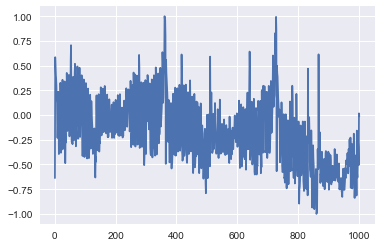

In [125]:
data_log=np.log(data)
data_log_scaled = scaler.fit_transform(data_log)
plt.plot(data_log_scaled)
plt.show()

In [ ]:
draw_rolling_average(data_log_scaled)

In [ ]:

plot_acf(data_log_scaled)
plt.show()

In [ ]:
DF_test(data_log)

滚动平均

In [ ]:
moving_average = pd.rolling_mean(data_log,30)
plt.plot(data_log)
plt.plot(moving_average, color='red')
plt.show()

In [ ]:
avg_diff = data_log - moving_average
# avg_diff

In [ ]:
avg_diff.dropna(inplace=True)
draw_rolling_average(avg_diff)
DF_test(avg_diff)

In [ ]:
plot_acf(avg_diff)
plt.show()

In [ ]:
plot_acf(avg_diff)
plt.show()

In [ ]:
avg_diff

指数加权平均

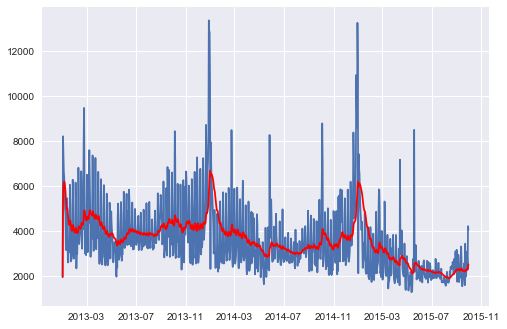

In [8]:
avg_weight = pd.ewma(data, halflife=12)
plt.plot(data)
plt.plot(avg_weight, color='red')
plt.show()

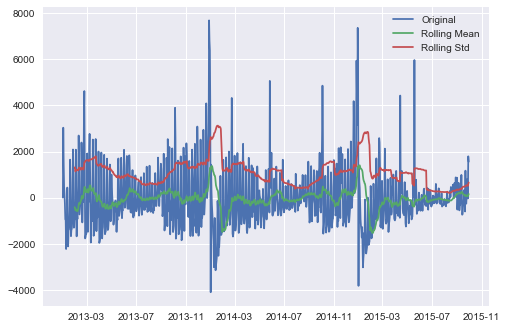

Test Statistic: -7.4962654774254025
p-value: 4.3714478226724206e-11
Lags Used: 21
Observations Used: 981
Critical Value (1%) -3.4370334797663844
Critical Value (5%) -2.8644907213150725
Critical Value (10%) -2.568341114581742


In [13]:
ewma_diff = data - avg_weight
draw_rolling_average(ewma_diff)
DF_test(ewma_diff)

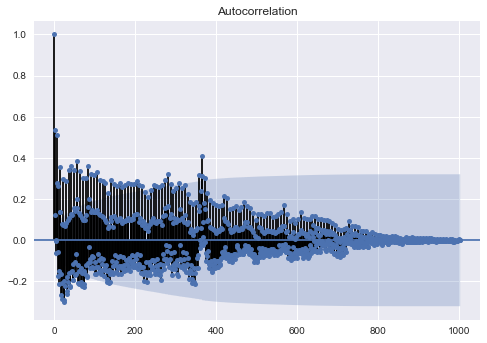

In [14]:
plot_acf(ewma_diff)
plt.show()

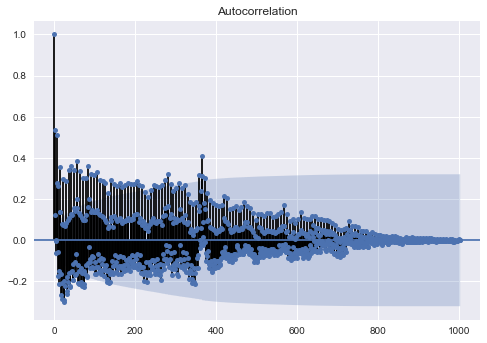

In [15]:
plot_acf(ewma_diff)
plt.show()

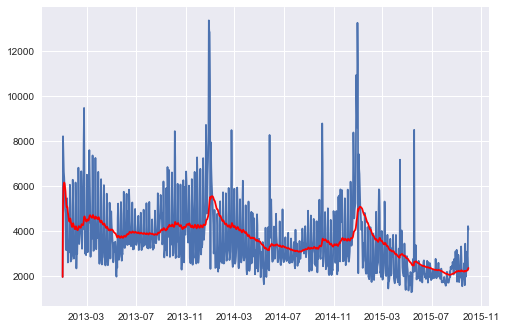

In [17]:
avg_weight2 = pd.ewma(data, halflife=26)
plt.plot(data)
plt.plot(avg_weight2, color='red')
plt.show()

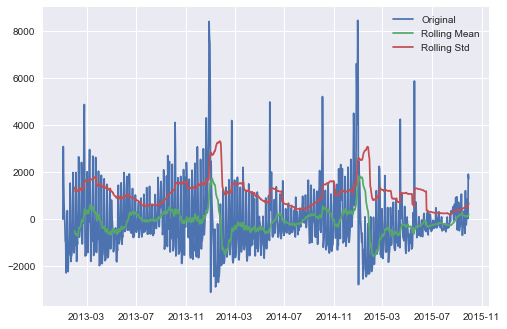

Test Statistic: -6.651031664449327
p-value: 5.120427184174129e-09
Lags Used: 21
Observations Used: 981
Critical Value (1%) -3.4370334797663844
Critical Value (5%) -2.8644907213150725
Critical Value (10%) -2.568341114581742


In [18]:
ewma_diff2 = data - avg_weight2
draw_rolling_average(ewma_diff2)
DF_test(ewma_diff2)

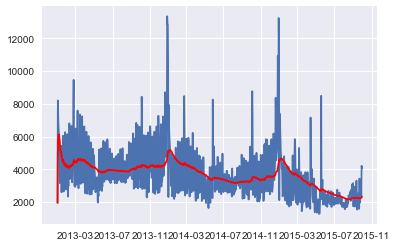

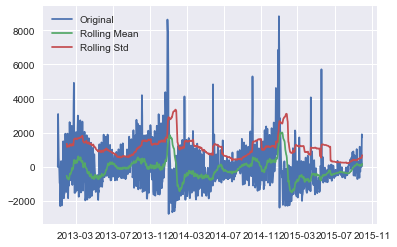

Test Statistic: -6.254675735239078
p-value: 4.368202133113921e-08
Lags Used: 21
Observations Used: 981
Critical Value (1%) -3.4370334797663844
Critical Value (5%) -2.8644907213150725
Critical Value (10%) -2.568341114581742


In [35]:
avg_weight3 = pd.ewma(data, halflife=38)
plt.plot(data)
plt.plot(avg_weight3, color='red')
plt.show()
ewma_diff3 = data - avg_weight3
draw_rolling_average(ewma_diff3)
DF_test(ewma_diff3)

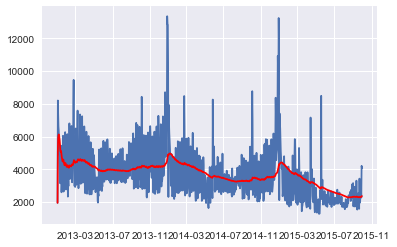

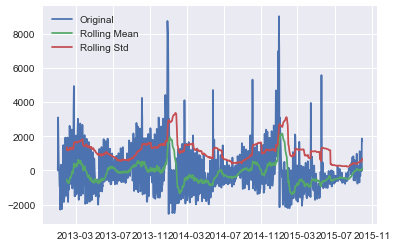

Test Statistic: -6.004741693298368
p-value: 1.6255976190508827e-07
Lags Used: 21
Observations Used: 981
Critical Value (1%) -3.4370334797663844
Critical Value (5%) -2.8644907213150725
Critical Value (10%) -2.568341114581742


In [46]:
avg_weight4 = pd.ewma(data, halflife=50)
plt.plot(data)
plt.plot(avg_weight4, color='red')
plt.show()
ewma_diff4 = data - avg_weight4
draw_rolling_average(ewma_diff4)
DF_test(ewma_diff4)

In [47]:
x_train = pd.DataFrame(ewma_diff)
x_train.index=pd.date_range('2013-01-01','2015-09-30')
x_train.columns = ['ewma12']
x_train['ewma26']=ewma_diff2
x_train['ewma38']=ewma_diff3
x_train['ewma50']=ewma_diff4

In [ ]:
ewma_t-1=

In [48]:
x_train

,ewma12,ewma26,ewma38,ewma50
2013-01-01,0.000000,0.000000,0.000000,0.000000
2013-01-02,3033.314856,3081.866981,3095.013353,3101.849895
2013-01-03,1461.020115,1516.664958,1531.866667,1539.794401
2013-01-04,477.543752,526.572037,540.148224,547.258429
2013-01-05,160.330583,201.696592,213.337108,219.464322
2013-01-06,-264.879738,-235.350330,-226.773135,-222.214400
2013-01-07,-946.684194,-937.919962,-934.785266,-933.024848
2013-01-08,-982.940926,-992.416190,-994.120323,-994.856655
2013-01-09,-2233.957530,-2281.480391,-2293.217728,-2299.121383
2013-01-10,-1965.639708,-2042.756736,-2062.451582,-2072.476591


In [49]:
x_train=scaler.fit_transform(x_train)

消除趋势和季节性

1阶差分

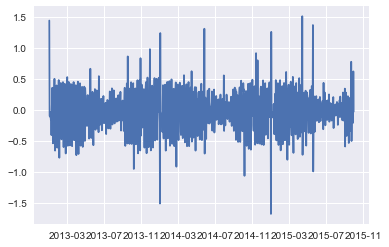

In [250]:
data_diff = data_log - data_log.shift()
plt.plot(data_diff)
plt.show()

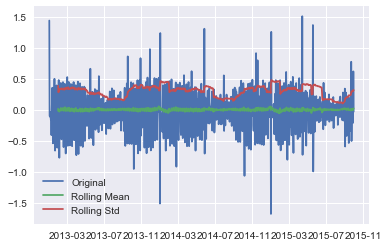

Test Statistic: -8.506902880011165
p-value: 1.1960931918027687e-13
Lags Used: 20
Observations Used: 981
Critical Value (1%) -3.4370334797663844
Critical Value (5%) -2.8644907213150725
Critical Value (10%) -2.568341114581742


In [251]:
data_diff.dropna(inplace=True)
draw_rolling_average(data_diff)
DF_test(data_diff)

In [ ]:
plot_acf(data_diff)
plt.show()

分解

In [145]:
new_datalog=ori_data
new_datalog.shape

(1034,)

In [129]:
data_log
dd=pd.DataFrame(data_log)
dd

,item_cnt_day
date,
2013-01-01,7.576097
2013-01-02,9.011646
2013-01-03,8.912204
2013-01-04,8.797397
2013-01-05,8.755580
2013-01-06,8.675564
2013-01-07,8.513988
2013-01-08,8.470521
2013-01-09,8.058960


In [237]:
data

In [232]:
data.shape

(365,)

In [256]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_diff.values,freq = 7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid



TypeError: 'numpy.float64' object cannot be interpreted as an integer

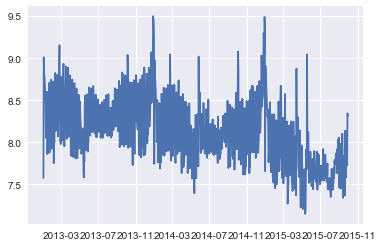

In [149]:
plt.plot(data_log, label='Original')
plt.show()



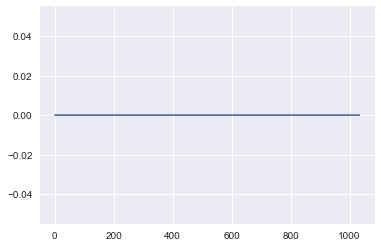

In [150]:
plt.plot(seasonal,label='Seasonality')
plt.show()

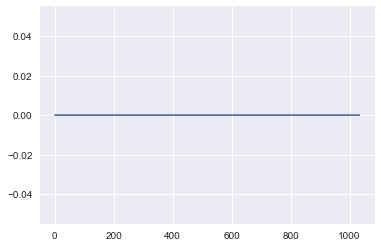

In [151]:
plt.plot(residual, label='Residuals')
plt.show()

In [ ]:
da_decompose = residual
da_decompose = da_decompose[~np.isnan(da_decompose)]
draw_rolling_average(da_decompose)
DF_test(da_decompose)

白噪声监测

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
result = acorr_ljungbox(data_log, lags=1)

In [ ]:
result

P - value 显著小于0.05 为非白噪声序列

定阶

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
def test_p_q(data):
    pmax = int(len(data_log)/100)
    qmax = int(len(data_log)/100)
    bic_matrix = [] 
    for p in range(pmax+1):
      tmp = []
      for q in range(qmax+1):
        try: 
          tmp.append(ARIMA(data_log, (p,1,q)).fit().bic)
        except:
          tmp.append(None)
      bic_matrix.append(tmp)
    bic_matrix = pd.DataFrame(bic_matrix)
    p,q = bic_matrix.stack().idxmin() 
    print(u'BIC最小的p值和q值为：%s、%s' %(p,q)) 

In [ ]:
model = ARIMA(data_log, (9,1,8)).fit() 

In [ ]:
res=model.forecast(30)[0] 

In [ ]:
newres=np.exp(res)

In [ ]:
newres

In [ ]:
pd.date_range('2015-10-01','2017-10-30')

In [ ]:
newres = pd.DataFrame(newres)

In [ ]:
newres.index=pd.date_range('2015-10-01','2015-10-30')

In [ ]:
newres

In [ ]:
def Draw_pre(newres):
    plt.figure(figsize=(40,10)) 
    plt.plot(ori_data,color='green',label='original')
    plt.plot(newres,color='black',label='predict')
    plt.legend()
    plt.show()

In [ ]:
Draw_pre(newres)

判定拟合度 RMSE(Root Mean Squared Error) 

In [ ]:
predict = model.predict()
#predict =np.exp(predict)
RMSE = np.sqrt(((predict-data_log)**2).sum()/data_log.size)
RMSE

滚动平均的效果

In [ ]:
test_p_q(avg_diff)


In [ ]:
avg_diff
model = ARIMA(avg_diff, (3,0,2)).fit() 
#moving_average

In [ ]:
predict = model.predict()
#predict =np.exp(predict)
RMSE = np.sqrt(((predict-data_log)**2).sum()/data_log.size)
RMSE

In [ ]:
predict = model.predict()
#predict =np.exp(predict)
MSE =((np.exp(predict)-np.exp(data_log))**2).sum()/data_log.size
MSE

In [ ]:
res=model.forecast(30)[0] 
nnres=res.cumsum()
lnnres=np.exp(nnres)
lnnres

In [ ]:
res

In [ ]:
加权指数平均

In [ ]:
import statsmodels.tsa.stattools as st
order = st.arma_order_select_ic(avg_diff,max_ar=3,max_ma=3,ic=['aic', 
'bic', 'hqic'])
avg_diff.dropna(inplace=True)
model = ARIMA(avg_diff,(3,0,2)).fit()

In [ ]:
order.bic_min_order

In [ ]:
model = ARIMA(ewma_diff,(3,0,2)).fit()

In [ ]:
predict = model.predict()
#predict =np.exp(predict)
RMSE = np.sqrt(((predict-data_log)**2).sum()/data_log.size)
RMSE

In [ ]:
ewares=model.forecast(30)[0] 

ewares=ewares.cumsum()
ewares
lnnres=np.exp(ewares)


下面是DEEP learning 部分

In [79]:
#Import Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline
import tensorflow as tf
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

In [73]:
#x_train.shape
data.shape

(1003,)

In [188]:
# x scaling
x_scaler = MinMaxScaler().fit(x_train)
x_train = x_scaler.transform(x_train)

# y scaling
y_scaler = MinMaxScaler().fit(data)
data = y_scaler.transform(data)


/Users/shihongliang/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/shihongliang/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [209]:
num_periods = 33
f_horizon = 1  #forecast horizon, one period into the future

x_data = x_train[:(len(x_train)-(len(x_train) % num_periods))]
x_batches = x_data.reshape(-1, 33, 4)

y_data = data[:(len(x_train)-(len(x_train) % num_periods))]
y_batches = y_data.reshape(-1, 33, 1)
print (len(x_batches))
print (x_batches.shape)
print (x_batches[0:2])

print (y_batches[0:1])
print (y_batches.shape)

30
(30, 33, 4)
[[[0.3482195  0.26872451 0.23784376 0.22019752]
  [0.60523243 0.53574831 0.50538953 0.48802492]
  [0.47201181 0.4001337  0.37026466 0.35315016]
  [0.38868181 0.31434856 0.28453641 0.26745023]
  [0.36180432 0.28620021 0.25628551 0.23914704]
  [0.32577622 0.24833293 0.21824056 0.20101055]
  [0.26800689 0.18745982 0.15703706 0.13963604]
  [0.26493486 0.18273808 0.15190789 0.13429721]
  [0.15893615 0.07104902 0.03960853 0.02168124]
  [0.18167074 0.09173288 0.05955691 0.04125075]
  [0.25281037 0.16341529 0.1307656  0.11221401]
  [0.38492363 0.29993975 0.2673035  0.24875527]
  [0.30772124 0.22079828 0.18826775 0.1697674 ]
  [0.16864942 0.0757129  0.0427631  0.02404392]
  [0.22751586 0.13433057 0.10080876 0.0817946 ]
  [0.23075592 0.13618402 0.10224624 0.08301465]
  [0.2461561  0.15081663 0.11651575 0.09709294]
  [0.30035838 0.20622359 0.17173623 0.15221097]
  [0.48766403 0.4014658  0.36739634 0.34807318]
  [0.40366285 0.31732345 0.28385236 0.26482361]
  [0.20627725 0.11305766 

In [210]:
def test_data(series,forecast,num_periods):
    test_x_setup = x_train[-(num_periods + forecast):]
    testX = test_x_setup[:num_periods].reshape(-1, 33, 4)
    testY = data[-(num_periods):].reshape(-1, 33, 1)
    return testX,testY

X_test, Y_test = test_data(data,f_horizon,num_periods )
print (X_test.shape)
print (Y_test)

(1, 33, 4)
[[[0.15013671]
  [0.11972823]
  [0.08086834]
  [0.15577098]
  [0.0384456 ]
  [0.0761455 ]
  [0.07937692]
  [0.13745961]
  [0.11301682]
  [0.03720275]
  [0.05476841]
  [0.0534427 ]
  [0.07473693]
  [0.11815395]
  [0.16819952]
  [0.11483967]
  [0.02295136]
  [0.02203994]
  [0.04722844]
  [0.05079128]
  [0.06993123]
  [0.10622255]
  [0.07970834]
  [0.02585135]
  [0.17847378]
  [0.06545696]
  [0.05733698]
  [0.08641975]
  [0.14922529]
  [0.12793106]
  [0.08293976]
  [0.24318502]
  [0.2315022 ]]]


In [211]:
tf.reset_default_graph()   #We didn't have any previous graph objects running, but this would reset the graphs

num_periods = 33      #number of periods per vector we are using to predict one period ahead
inputs = 4           #number of vectors submitted
hidden = 100          #number of neurons we will recursively work through, can be changed to improve accuracy
output = 1            #number of output vectors

X = tf.placeholder(tf.float32, [None, num_periods, inputs])   #create variable objects
y = tf.placeholder(tf.float32, [None, num_periods, output])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)   #create our RNN object
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)               #choose dynamic over static

learning_rate = 0.001   #small learning rate so we don't overshoot the minimum

stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])           #change the form into a tensor
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)        #specify the type of layer (dense)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])          #shape of results
 
loss = tf.reduce_sum(tf.square(outputs - y))    #define the cost function which evaluates the quality of our model
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)          #gradient descent method
training_op = optimizer.minimize(loss)          #train the result of the application of the cost_function                                 
init = tf.global_variables_initializer()

In [201]:
epochs = 1000    #number of iterations or training cycles, includes both the FeedFoward and Backpropogation

with tf.Session() as sess:
    init.run()
    ans=[]
    for ep in range(epochs):
        ans=sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
        if ep % 10 == 0:
            print(ep, "\tMSE:", mse)
    y_pred = sess.run(outputs, feed_dict={X: X_test})
    x_pred = sess.run(outputs, feed_dict={X: x_batches})
    print(y_pred)

0 	MSE: 23.964031
10 	MSE: 7.973961
20 	MSE: 5.687477
30 	MSE: 4.189227
40 	MSE: 3.3119216
50 	MSE: 2.7502718
60 	MSE: 2.5216274
70 	MSE: 2.2996175
80 	MSE: 2.085455
90 	MSE: 1.9583893
100 	MSE: 1.8899953
110 	MSE: 1.8420997
120 	MSE: 1.801994
130 	MSE: 1.7686656
140 	MSE: 1.7307372
150 	MSE: 1.7077868
160 	MSE: 1.6659491
170 	MSE: 1.6209145
180 	MSE: 1.5705742
190 	MSE: 1.6990192
200 	MSE: 1.5443659
210 	MSE: 1.4857169
220 	MSE: 1.4553232
230 	MSE: 1.4253917
240 	MSE: 1.3941228
250 	MSE: 1.370525
260 	MSE: 1.4018035
270 	MSE: 1.3295586
280 	MSE: 1.3153889
290 	MSE: 1.3028343
300 	MSE: 1.2933786
310 	MSE: 1.2739937
320 	MSE: 1.2700739
330 	MSE: 1.2511302
340 	MSE: 1.2246941
350 	MSE: 1.204503
360 	MSE: 1.2015961
370 	MSE: 1.185817
380 	MSE: 1.1770205
390 	MSE: 1.1929259
400 	MSE: 1.1846869
410 	MSE: 1.157841
420 	MSE: 1.1512501
430 	MSE: 1.1584991
440 	MSE: 1.176398
450 	MSE: 1.0910786
460 	MSE: 1.0785323
470 	MSE: 1.0827181
480 	MSE: 1.091167
490 	MSE: 1.0758374
500 	MSE: 1.0879015
51

In [206]:
Y_test[0]

array([[0.02585135],
       [0.17847378],
       [0.06545696],
       [0.05733698],
       [0.08641975],
       [0.14922529],
       [0.12793106],
       [0.08293976],
       [0.24318502],
       [0.2315022 ]])

In [207]:
y_pred1 = y_scaler.inverse_transform(y_pred[0])
Y_test1 = y_scaler.inverse_transform(Y_test[0])


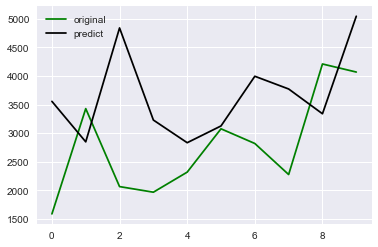

In [208]:
plt.figure() 
plt.plot(Y_test1,color='green',label='original')
plt.plot(y_pred1,color='black',label='predict')
plt.legend()
plt.show()

In [115]:
x_pred.shape
xx=x_pred.reshape(1000,1)
xx
yy=y_batches.reshape(1000,1)


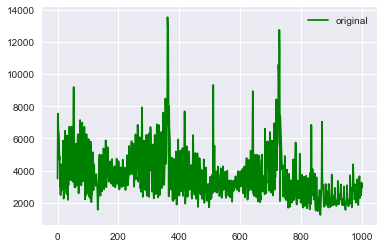

In [117]:
plt.plot(xx,color='green',label='original')

plt.legend()
plt.show()

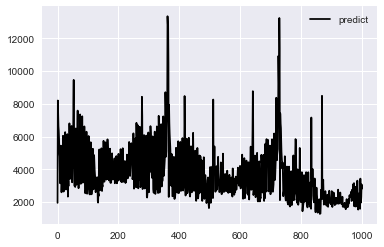

In [118]:
plt.plot(yy,color='black',label='predict')
plt.legend()
plt.show()

In [91]:
outputs.graph


In [120]:
len(y_pred[0])
y_res=pd.DataFrame(y_pred[0])

In [121]:
y_res.index=pd.date_range('2015-09-27','2015-10-06')

In [122]:
X_res=pd.DataFrame(Y_test[0])
X_res.index=pd.date_range('2015-09-27','2015-10-06')

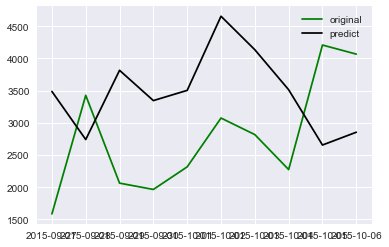

In [123]:
plt.figure() 
plt.plot(X_res,color='green',label='original')
plt.plot(y_res,color='black',label='predict')
plt.legend()
plt.show()

In [ ]:
truedata=np.exp(y_pred[0])

In [ ]:
truedata


In [ ]:
trueori=np.exp(Y_test[0])

In [ ]:
trueori

In [ ]:
plt.figure() 
plt.plot(trueori,color='green',label='original')
plt.plot(truedata,color='black',label='predict')
plt.legend()
plt.show()

In [ ]:
data_log

In [ ]:
train_log=data_log[]